In [235]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
import cv2
X,y = make_classification(n_samples=100, n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

In [236]:
print(X.shape)
print(y.shape)
print(X[:,0].shape)
print(X[:,1].shape)

(100, 2)
(100,)
(100,)
(100,)


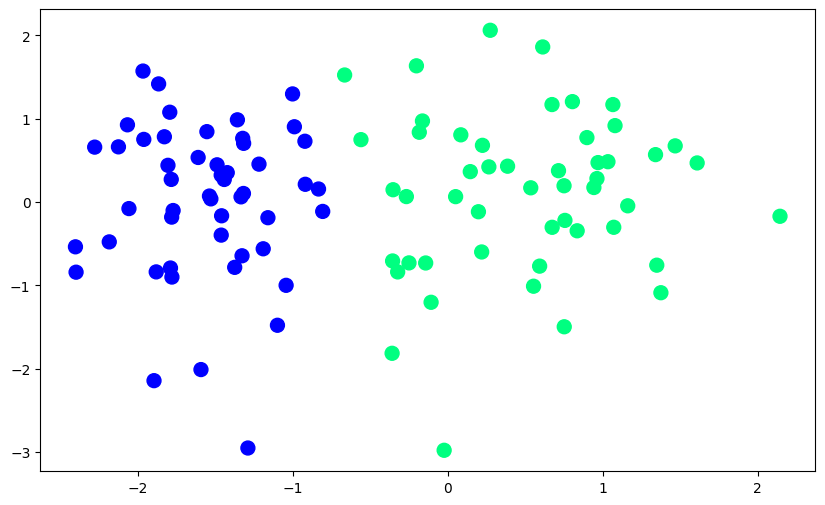

In [237]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [238]:
def step(val):
    return 1 if val>0 else 0

In [239]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr * (y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        

In [240]:
#print(np.insert(X,0,1,axis=1))
intercept, coef = perceptron(X,y)

In [241]:
print(intercept," intercept ")
print(coef," coefficients")

0.9  intercept 
[1.31982663 0.16381024]  coefficients


In [242]:
m = -(coef[0]/coef[1])
b = -(intercept/coef[1])

In [243]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

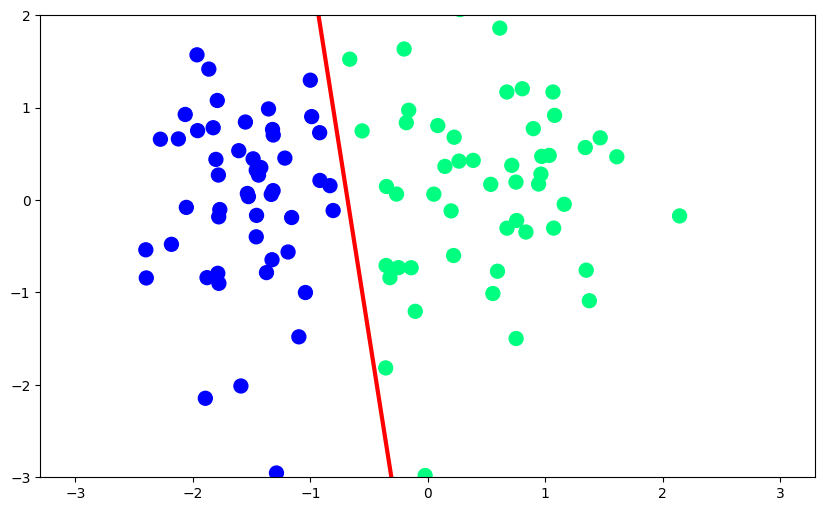

In [244]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [245]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [246]:
m,b = perceptron(X,y)
print(m)
print(m[-1:])
print(b[-1:])

[-1.0, -1.0, -1.0, -1.0, -1.207930481935621, -1.207930481935621, -1.4231870716408481, -1.4231870716408481, -2.206717012523775, -2.206717012523775, -2.206717012523775, -2.206717012523775, -2.206717012523775, -2.206717012523775, -2.206717012523775, -3.229479138817488, -3.229479138817488, -3.229479138817488, -3.229479138817488, -3.229479138817488, -3.229479138817488, -3.229479138817488, -3.229479138817488, -3.229479138817488, -3.229479138817488, -3.229479138817488, -3.229479138817488, -3.229479138817488, -3.229479138817488, -3.229479138817488, -3.229479138817488, -3.229479138817488, -3.229479138817488, -3.229479138817488, -3.229479138817488, -3.229479138817488, -3.229479138817488, -6.371776425544511, -6.371776425544511, -6.371776425544511, -6.371776425544511, -6.371776425544511, -6.371776425544511, -6.371776425544511, -6.371776425544511, -6.371776425544511, -6.371776425544511, -6.371776425544511, -6.371776425544511, -6.371776425544511, -6.371776425544511, -6.371776425544511, -6.3717764255

In [247]:
prev_x_i = np.arange(-3, 3, 100)
prev_y_i = prev_x_i*m +b


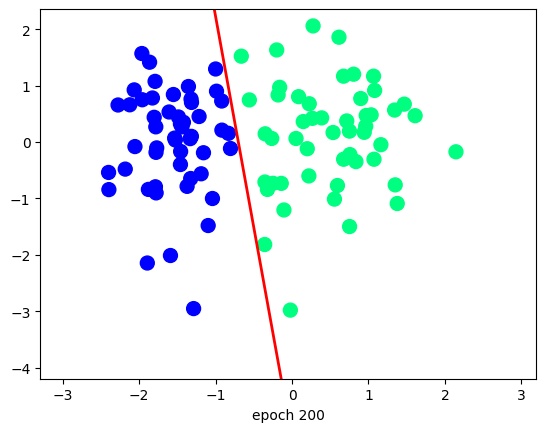

In [248]:
%matplotlib inline
# fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = plt.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
updated_y_i = y_i
# plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    updated_y_i = x_i*m[i] + b[i]
    line.set_ydata(updated_y_i)
    #plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
    # line, = plt.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
    # plt.ylim(-3,3)
    plt.xlabel(label)
    # filename = f'frame_{i:03d}.png'
    # plt.savefig(filename)
    

for i in range(200):
    update(i)
    #print(updated_y_i)

# img = cv2.imread('frame_000.png')
# print(img.shape)
# height, width, layers = img.shape
# video = cv2.VideoWriter('animation_cv2.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 10, (480,640))

# for i in range(100):
#     filename = f'frame_{i:03d}.png'
#     video.write(cv2.imread(filename))

# cv2.destroyAllWindows()
# video.release()

# # Clean up: delete the temporary image files
# import os
# for i in range(100):
#     filename = f'frame_{i:03d}.png'
#     os.remove(filename)

In [249]:
# for i in range(200):
#     update(i)

# # Use OpenCV to create video from saved frames
# img = cv2.imread('frame_000.png')
# height, width, layers = img.shape
# video = cv2.VideoWriter('animation_cv2.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 10, (width,height))

# for i in range(200):
#     filename = f'frame_{i:03d}.png'
#     video.write(cv2.imread(filename))

# cv2.destroyAllWindows()
# video.release()

# # Clean up: delete the temporary image files
# import os
# for i in range(200):
#     filename = f'frame_{i:03d}.png'
#     os.remove(filename)

In [250]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [251]:
m = -(lr.coef_[0][0]/lr.coef_[0][1])
b = -(lr.intercept_/lr.coef_[0][1])

In [252]:
data = np.linspace(-3,3,100)
y_pred = m * data + b
m1,b1 = perceptron(X,y)
print(len(m1)," ",len(b1))

print("M:",m," M1 :",m1[-1]," B :",b," B1:",b1[-1])
y_pred_perceptron = m1[-1] * data + b1[-1]

200   200
M: -126.2470635231025  M1 : -6.133487737520329  B : [-81.16386951]  B1: -4.7036805871633485


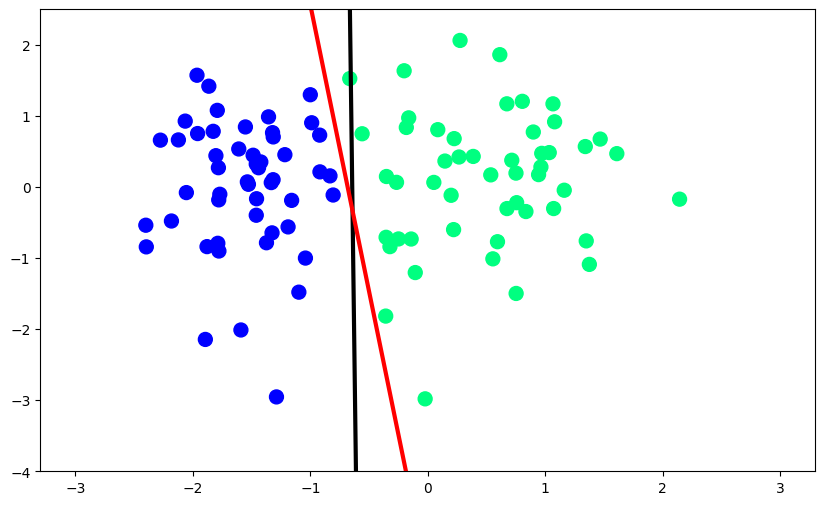

In [253]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.plot(data,y_pred,c='black',linewidth=3)
plt.plot(x_input,y_input,c='red',linewidth=3)
plt.ylim(-4,2.5)
plt.show()
